### Проект 2 [Цена дома]

Вам предоставляется набор данных, содержащий информацию о домах и **ценах**. Набор данных уже разделен на ```train.csv``` и ```test.csv```. Файл ```data_description.txt``` содержит описание столбцов.

**Цель:** построить модели для прогнозирования цен на дома.

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик регрессии.

**Примечание:** вам **рекомендуется** искать другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле test.csv.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train_data = pd.read_csv('./train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1030,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,118000
1,366,70,RM,59.0,10690,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,147000
2,883,60,RL,NaN,9636,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,178000
3,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
4,1360,20,RL,129.0,16737,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,315000


In [3]:
test_data = pd.read_csv('./test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,214000
1,932,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,117500
2,647,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,98300
3,547,50,RL,70.0,8737,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,210000
4,812,120,RM,NaN,4438,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,ConLD,Normal,144500


In [4]:
train_data.set_index('Id', inplace = True)
test_data.set_index('Id', inplace = True)
train_index = train_data.index.tolist()
test_index = test_data.index.tolist()

In [5]:
combined_data = pd.concat([train_data, test_data])

In [6]:
combined_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1030,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,118000
366,70,RM,59.0,10690,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,147000
883,60,RL,NaN,9636,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,178000
94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
1360,20,RL,129.0,16737,Pave,NaN,Reg,Lvl,AllPub,FR3,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,315000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
1168,60,RL,58.0,10852,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2006,WD,Normal,173000
641,120,RL,62.0,12677,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,274000


In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1030 to 1042
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearB

In [8]:
combined_data = combined_data.drop(['Alley', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis = 1)

Мы убрали эти столбы в связи с тем, что информация в них отсутствует больше чем на 70 процентов, и тем самым дают мало информации для прогнозирования цен на квартиры в дальнейшем.

In [9]:
obj_data = combined_data.select_dtypes(include=['object'])
obj_data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1030,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
366,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,FuseA,TA,Typ,Detchd,Unf,TA,Fa,Y,WD,Normal
883,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,BuiltIn,RFn,TA,TA,Y,WD,Normal
94,C (all),Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
1360,RL,Pave,Reg,Lvl,AllPub,FR3,Gtl,NridgHt,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


In [10]:
numeric_data = combined_data.select_dtypes(exclude=['object'])
numeric_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1030,160,21.0,1680,6,7,1972,1972,281.0,317,0,...,264,0,28,0,0,0,0,5,2006,118000
366,70,59.0,10690,5,7,1920,1997,0.0,456,0,...,468,0,128,218,0,0,0,7,2009,147000
883,60,NaN,9636,6,5,1992,1993,0.0,0,0,...,389,342,40,0,0,0,0,12,2009,178000
94,190,60.0,7200,6,6,1910,1998,0.0,1046,0,...,506,0,0,0,0,99,0,11,2007,133900
1360,20,129.0,16737,9,5,2004,2005,66.0,1447,0,...,770,194,45,0,0,0,0,9,2006,315000


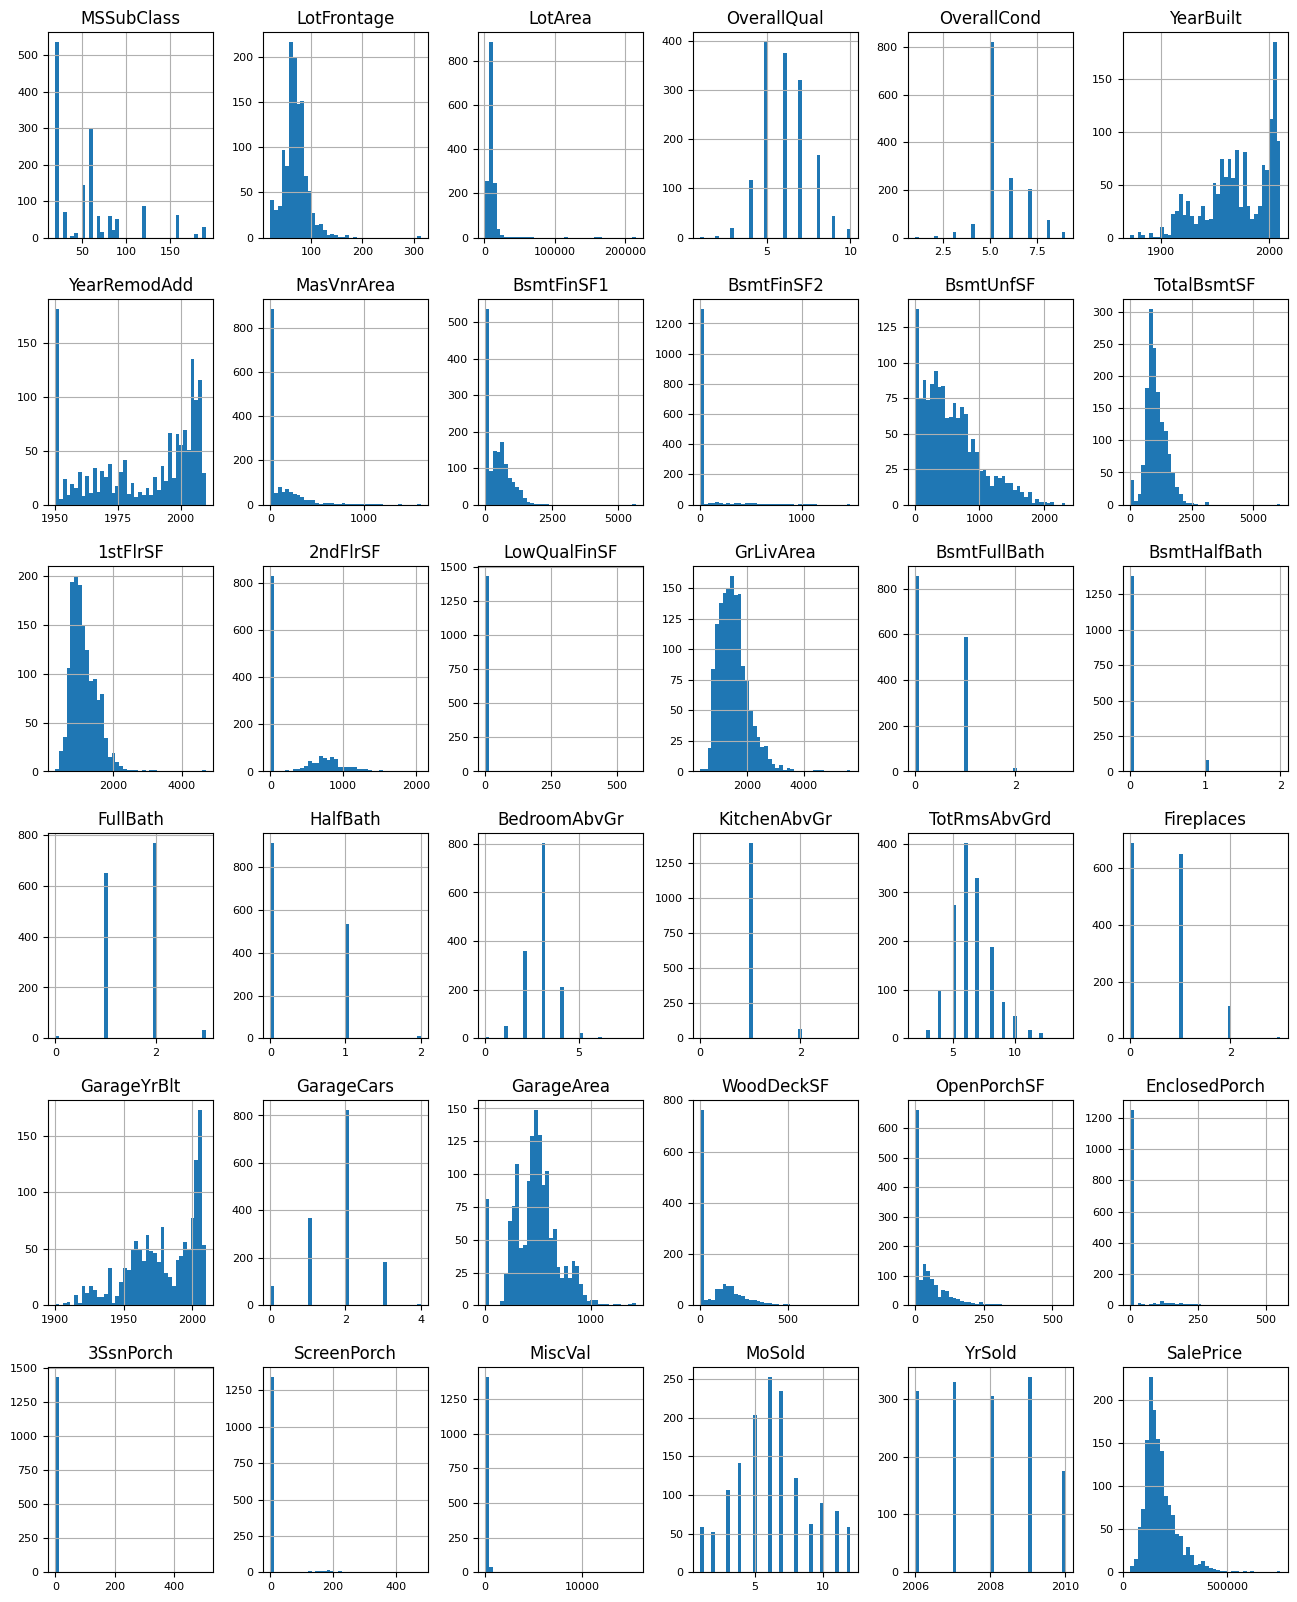

In [11]:
numeric_data.query("index != 'Id'").hist(figsize=(16, 20), bins=40, xlabelsize=8, ylabelsize=8);

In [12]:
combined_data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

In [13]:
missing_values = numeric_data.isnull().sum()
missing_values[missing_values > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Для того, чтобы заполнить пустые строки в столбцах, нужно проверить распределение значений на асимметрию. В случае если будет положительное значение асимметрии, то распределение распределено вправо, то есть больше данных с низкими значениями. Если значение асимметрии отрицательно, то распределение смещено влево (больше данных с высокими значениями).

In [14]:
print(f'''LotFrontage skewness: {numeric_data['LotFrontage'].skew()}
MasVNrArea skewness: {numeric_data['MasVnrArea'].skew()}
GarageYrBlt skewness: {numeric_data['GarageYrBlt'].skew()}''')

LotFrontage skewness: 2.1635691423248833
MasVNrArea skewness: 2.6690842101828625
GarageYrBlt skewness: -0.6494146238714678


Будем использовать медианные данные для заполнения пустых строк

In [15]:
median = combined_data['LotFrontage'].median()
columns = missing_values[missing_values > 0].index.tolist()

for col in columns:
    median = combined_data[col].median()
    combined_data[col].fillna(median, inplace = True)

In [16]:
combined_data.select_dtypes(exclude = 'object').isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# Теперь обработаем строчные данные

In [17]:
missing_values_obj = obj_data.isnull().sum()
col_obj = missing_values_obj[missing_values_obj > 0]
col_obj

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

Для заполнения пустых строк в строчных данных будем использовать функцию mode()

In [18]:
for col in col_obj.index.tolist():
    moda = combined_data[col].mode().iloc[0]
    combined_data[col].fillna(moda, inplace = True)

In [19]:
combined_data.select_dtypes(include = 'object').isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1030 to 1042
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearR

Обратившись к файлу "data_description" и посмотрев, какой параметр что из себя представляет, можно сделать некие выводы, что столбцы Street, Utilities 

In [21]:
del combined_data['Street']
del combined_data['Utilities']

In [22]:
combined_data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1030,160,RM,21.0,1680,Reg,Lvl,Inside,Gtl,BrDale,Norm,...,28,0,0,0,0,5,2006,WD,Normal,118000
366,70,RM,59.0,10690,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,...,128,218,0,0,0,7,2009,WD,Normal,147000
883,60,RL,69.0,9636,IR1,Lvl,Corner,Gtl,Gilbert,Norm,...,40,0,0,0,0,12,2009,WD,Normal,178000
94,190,C (all),60.0,7200,Reg,Lvl,Corner,Gtl,OldTown,Norm,...,0,0,0,99,0,11,2007,WD,Normal,133900
1360,20,RL,129.0,16737,Reg,Lvl,FR3,Gtl,NridgHt,Norm,...,45,0,0,0,0,9,2006,WD,Normal,315000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,20,RL,62.0,70761,IR1,Low,Inside,Mod,ClearCr,Norm,...,54,0,0,0,0,12,2006,WD,Normal,280000
1168,60,RL,58.0,10852,IR1,Lvl,Inside,Gtl,Gilbert,RRAn,...,38,0,0,0,0,2,2006,WD,Normal,173000
641,120,RL,62.0,12677,IR1,Lvl,Inside,Gtl,NridgHt,Norm,...,140,0,0,0,0,4,2008,WD,Normal,274000


После очистки и заполнения пустых строк данными, можно обратно поделить данные на train и test

In [23]:
train_data = combined_data.loc[train_index]
test_data = combined_data.loc[test_index]

Следующим шагом будет построение матрицы корреляции, по которой будет определяться, какие параметры больше всего будут коррелировать с SalePrice

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

(36, 36)

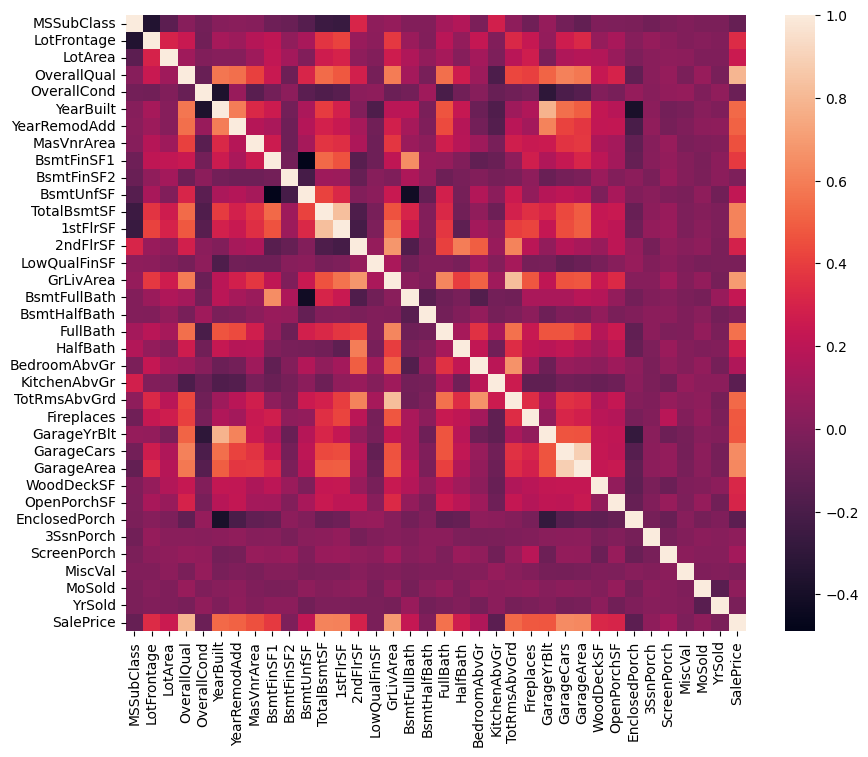

In [25]:
corr_matrix = train_data.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix)
corr_matrix.shape

Теперь выведем топ 10 коррелируемых признаков и также составим матрицу корреляции, но только уже с аннотацией

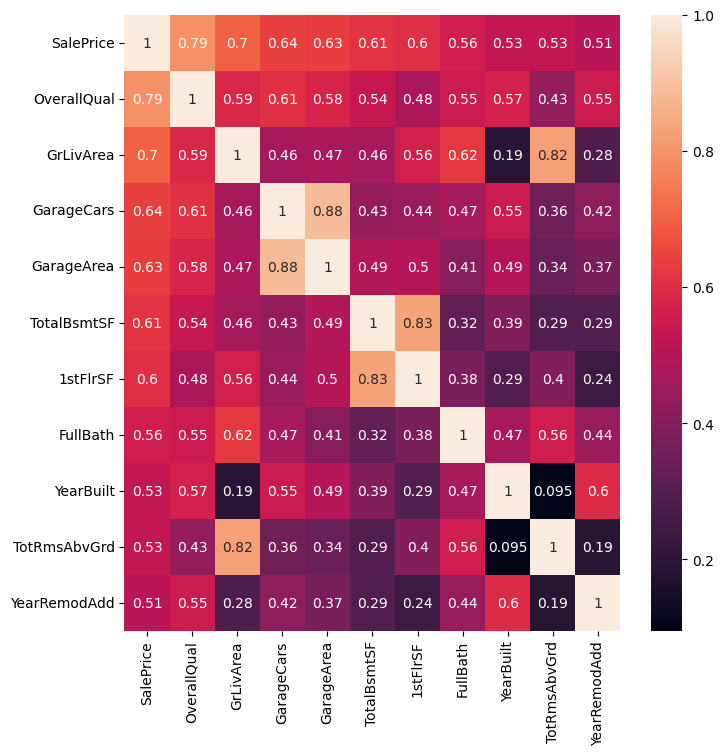

In [26]:
important = corr_matrix.nlargest(11, 'SalePrice')['SalePrice'].index.tolist()
plt.figure(figsize = (8, 8))
corr_important = train_data[important].corr()
sns.heatmap(corr_important, annot = True)
plt.show()


Во избежание мультиколлинеарности, и для того, чтобы обучаемая модель в дальнейшем была стабильной, уберем параметры, которые коррелируют между собой очень сильно, от 0.7 и выше.

In [27]:
del train_data['GrLivArea']
del train_data['GarageCars']
del train_data['TotalBsmtSF']

del test_data['GrLivArea']
del test_data['GarageCars']
del test_data['TotalBsmtSF']

In [28]:
feature_remove = ['GrLivArea', 'GarageCars', 'TotalBsmtSF']
for feature in feature_remove:
    while feature in important:
        important.remove(feature)
print(important)

['SalePrice', 'OverallQual', 'GarageArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd', 'YearRemodAdd']


Мы вывели признаки, включающие в себе числовые данные, которые наиболее сильно коррелируют с SalePrice. Теперь нужно проделать такого типа анализ с категориальными данными, и вывести наиболее значимые признаки, которые в дальнейшем будут кодированы в числовые значения.

Для этого воспользуемся алгоритмом Крускалла-Уолисса, и выведем наиболее статистически значимые параметры.

Первым шагом будет определение параметров, у которых 2 и более ранговых значений.

In [29]:
vars_2 = [col for col in train_data.columns if train_data[col].nunique() == 2]
vars_2

['CentralAir']

In [30]:
train_data_obj = train_data.select_dtypes(include = 'object')
vars_3_and_more = [col for col in train_data_obj.columns if train_data_obj[col].nunique() >= 3]
print(vars_3_and_more)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [31]:
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

significant_vars = []

for var in vars_3_and_more:
    groups = []
    for category in train_data['SalePrice'].unique():
        group = train_data[train_data['SalePrice'] == category][var]
        groups.append(group)
        
    _, p_value = stats.kruskal(*groups)
    
    if p_value < 0.05:
        significant_vars.append(var)
        
    print(f"Variable: {var}")
    print(f"Kruskal-Wallis p-value: {p_value}\n")

Variable: MSZoning
Kruskal-Wallis p-value: 0.004074191653116089

Variable: LotShape
Kruskal-Wallis p-value: 0.006420864161914074

Variable: LandContour
Kruskal-Wallis p-value: 0.35447031851901706

Variable: LotConfig
Kruskal-Wallis p-value: 0.6167438592060134

Variable: LandSlope
Kruskal-Wallis p-value: 0.043017582814372665

Variable: Neighborhood
Kruskal-Wallis p-value: 0.019965686252075055

Variable: Condition1
Kruskal-Wallis p-value: 0.959960996160917

Variable: Condition2
Kruskal-Wallis p-value: 0.8985344083044514

Variable: BldgType
Kruskal-Wallis p-value: 0.583898516525606

Variable: HouseStyle
Kruskal-Wallis p-value: 0.43222497612063504

Variable: RoofStyle
Kruskal-Wallis p-value: 0.09981884635934718

Variable: RoofMatl
Kruskal-Wallis p-value: 0.9095265451434795

Variable: Exterior1st
Kruskal-Wallis p-value: 0.8466475327974062

Variable: Exterior2nd
Kruskal-Wallis p-value: 0.6484802563791424

Variable: MasVnrType
Kruskal-Wallis p-value: 0.02105907503918154

Variable: ExterQual
K

В результате теста мы получили статистическое значение, называемое p-значением. Если p-значение меньше уровня значимости 0.05, то мы можем сделать вывод, что различия в росте между группами статистически значимы. Возьмём топ 5 статистически значимых параметров.

In [32]:
significant_vars.sort(key = lambda x: stats.kruskal(*[train_data[train_data['SalePrice'] == category][x] for category in train_data['SalePrice'].unique()])[1])

In [33]:
final_vars_obj = significant_vars[:5]
final_vars_obj

['ExterQual', 'KitchenQual', 'GarageFinish', 'BsmtQual', 'SaleCondition']

Теперь собираем все получившиеся параметры воедино, для того чтобы в дальнейшем по данным параметрам обучить модель

In [34]:
final_vars = important + vars_2 + final_vars_obj
final_vars

['SalePrice',
 'OverallQual',
 'GarageArea',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'CentralAir',
 'ExterQual',
 'KitchenQual',
 'GarageFinish',
 'BsmtQual',
 'SaleCondition']

In [35]:
train_data = train_data[final_vars]
test_data = test_data[final_vars]

In [36]:
train_data

,SalePrice,OverallQual,GarageArea,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,CentralAir,ExterQual,KitchenQual,GarageFinish,BsmtQual,SaleCondition
Id,,,,,,,,,,,,,,
1030,118000,6,264,672,1,1972,7,1972,Y,TA,TA,Unf,TA,Normal
366,147000,5,468,672,1,1920,6,1997,Y,TA,TA,Unf,TA,Normal
883,178000,6,389,808,2,1992,7,1993,Y,TA,TA,RFn,Gd,Normal
94,133900,6,506,1260,2,1910,9,1998,N,TA,TA,Unf,TA,Normal
1360,315000,9,770,1980,2,2004,8,2005,Y,Gd,Ex,Fin,Ex,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,133900,5,396,768,1,1972,5,2003,Y,TA,TA,Fin,Gd,Normal
316,188500,7,432,716,2,2004,6,2005,Y,Gd,Gd,Fin,Gd,Normal
206,180500,7,500,1442,2,1990,5,1990,Y,TA,TA,RFn,Gd,Normal


In [37]:
test_data

,SalePrice,OverallQual,GarageArea,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,CentralAir,ExterQual,KitchenQual,GarageFinish,BsmtQual,SaleCondition
Id,,,,,,,,,,,,,,
1227,214000,6,668,894,2,2007,9,2007,Y,Gd,Gd,Fin,Gd,Normal
932,117500,5,429,925,1,1965,5,1965,Y,TA,TA,Unf,TA,Normal
647,98300,5,420,1048,1,1950,7,1950,Y,TA,TA,Unf,TA,Normal
547,210000,6,440,915,1,1923,6,1950,Y,TA,TA,Unf,Gd,Normal
812,144500,6,420,848,1,2004,4,2004,Y,Gd,Gd,Fin,Gd,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,280000,7,576,1533,2,1975,5,1975,Y,TA,Gd,Unf,Gd,Normal
1168,173000,6,472,959,2,2000,7,2000,Y,TA,TA,Fin,Gd,Normal
641,274000,8,588,1518,1,2003,6,2004,Y,Ex,Ex,RFn,Ex,Normal


Теперь нужно сделать масштабирование данных. Будем использовать библиотеку sklearn класс MinMaxScaler.

In [38]:
from sklearn.preprocessing import MinMaxScaler

def scaler_transform(data, target):
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()

    num_cols = data.select_dtypes(exclude = 'object').columns
    for col in num_cols:
        if col == target:
            data[target] = scaler_y.fit_transform(data[[target]])
        else:
            data[col] = scaler_x.fit_transform(data[[col]])
        
    return data, scaler_y 

In [39]:
train_data, scaler = scaler_transform(train_data, target = "SalePrice")
train_data

,SalePrice,OverallQual,GarageArea,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,CentralAir,ExterQual,KitchenQual,GarageFinish,BsmtQual,SaleCondition
Id,,,,,,,,,,,,,,
1030,0.115401,0.555556,0.186178,0.077559,0.333333,0.724638,0.416667,0.366667,Y,TA,TA,Unf,TA,Normal
366,0.155673,0.444444,0.330042,0.077559,0.333333,0.347826,0.333333,0.783333,Y,TA,TA,Unf,TA,Normal
883,0.198722,0.555556,0.274330,0.108765,0.666667,0.869565,0.416667,0.716667,Y,TA,TA,RFn,Gd,Normal
94,0.137481,0.555556,0.356841,0.212483,0.666667,0.275362,0.583333,0.800000,N,TA,TA,Unf,TA,Normal
1360,0.388974,0.888889,0.543018,0.377696,0.666667,0.956522,0.500000,0.916667,Y,Gd,Ex,Fin,Ex,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0.137481,0.444444,0.279267,0.099587,0.333333,0.724638,0.250000,0.883333,Y,TA,TA,Fin,Gd,Normal
316,0.213304,0.666667,0.304654,0.087655,0.666667,0.956522,0.333333,0.916667,Y,Gd,Gd,Fin,Gd,Normal
206,0.202194,0.666667,0.352609,0.254245,0.666667,0.855072,0.250000,0.666667,Y,TA,TA,RFn,Gd,Normal


In [40]:
test_data, scaler = scaler_transform(test_data, target = "SalePrice")
test_data

,SalePrice,OverallQual,GarageArea,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,CentralAir,ExterQual,KitchenQual,GarageFinish,BsmtQual,SaleCondition
Id,,,,,,,,,,,,,,
1227,0.272566,0.500,0.535256,0.256324,0.5,0.980769,0.666667,0.966102,Y,Gd,Gd,Fin,Gd,Normal
932,0.101770,0.375,0.343750,0.273749,0.0,0.576923,0.222222,0.254237,Y,TA,TA,Unf,TA,Normal
647,0.067788,0.375,0.336538,0.342889,0.0,0.432692,0.444444,0.000000,Y,TA,TA,Unf,TA,Normal
547,0.265487,0.500,0.352564,0.268128,0.0,0.173077,0.333333,0.000000,Y,TA,TA,Unf,Gd,Normal
812,0.149558,0.500,0.336538,0.230467,0.0,0.951923,0.111111,0.915254,Y,Gd,Gd,Fin,Gd,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0.389381,0.625,0.461538,0.615514,0.5,0.673077,0.222222,0.423729,Y,TA,Gd,Unf,Gd,Normal
1168,0.200000,0.500,0.378205,0.292861,0.5,0.913462,0.444444,0.847458,Y,TA,TA,Fin,Gd,Normal
641,0.378761,0.750,0.471154,0.607083,0.0,0.942308,0.333333,0.915254,Y,Ex,Ex,RFn,Ex,Normal


Теперь обработаем категориальные данные с помощью LabelEncoder.

In [41]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(data):
    encoder = LabelEncoder()
    obj_cols = data.select_dtypes(include = 'object').columns
    for col in obj_cols:
        data[col] = encoder.fit_transform(data[[col]])
        
    return data


In [42]:
train_data = label_encoder(train_data)
train_data

,SalePrice,OverallQual,GarageArea,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,CentralAir,ExterQual,KitchenQual,GarageFinish,BsmtQual,SaleCondition
Id,,,,,,,,,,,,,,
1030,0.115401,0.555556,0.186178,0.077559,0.333333,0.724638,0.416667,0.366667,1,3,3,2,3,4
366,0.155673,0.444444,0.330042,0.077559,0.333333,0.347826,0.333333,0.783333,1,3,3,2,3,4
883,0.198722,0.555556,0.274330,0.108765,0.666667,0.869565,0.416667,0.716667,1,3,3,1,2,4
94,0.137481,0.555556,0.356841,0.212483,0.666667,0.275362,0.583333,0.800000,0,3,3,2,3,4
1360,0.388974,0.888889,0.543018,0.377696,0.666667,0.956522,0.500000,0.916667,1,2,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0.137481,0.444444,0.279267,0.099587,0.333333,0.724638,0.250000,0.883333,1,3,3,0,2,4
316,0.213304,0.666667,0.304654,0.087655,0.666667,0.956522,0.333333,0.916667,1,2,2,0,2,4
206,0.202194,0.666667,0.352609,0.254245,0.666667,0.855072,0.250000,0.666667,1,3,3,1,2,4


In [43]:
test_data = label_encoder(test_data)
test_data

,SalePrice,OverallQual,GarageArea,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,CentralAir,ExterQual,KitchenQual,GarageFinish,BsmtQual,SaleCondition
Id,,,,,,,,,,,,,,
1227,0.272566,0.500,0.535256,0.256324,0.5,0.980769,0.666667,0.966102,1,2,2,0,2,3
932,0.101770,0.375,0.343750,0.273749,0.0,0.576923,0.222222,0.254237,1,3,3,2,3,3
647,0.067788,0.375,0.336538,0.342889,0.0,0.432692,0.444444,0.000000,1,3,3,2,3,3
547,0.265487,0.500,0.352564,0.268128,0.0,0.173077,0.333333,0.000000,1,3,3,2,2,3
812,0.149558,0.500,0.336538,0.230467,0.0,0.951923,0.111111,0.915254,1,2,2,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0.389381,0.625,0.461538,0.615514,0.5,0.673077,0.222222,0.423729,1,3,2,2,2,3
1168,0.200000,0.500,0.378205,0.292861,0.5,0.913462,0.444444,0.847458,1,3,3,0,2,3
641,0.378761,0.750,0.471154,0.607083,0.0,0.942308,0.333333,0.915254,1,0,0,1,0,3


In [44]:
train_data['GarageFinish'].unique()

array([2, 1, 0])

Пришло время обучить наши данные. Для обучения будут использованы две модели, это RandomForestRegressor и GradientBoostingRegressor 

In [45]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regressor(data, parameters, target, n_estimators = None, random_state = None, max_depth = None):
    result = {}
    
    X = data[parameters[1:]].values
    y = data[target].values
    
    regressor = RandomForestRegressor(n_estimators = n_estimators, random_state = random_state, max_depth = max_depth)
    regressor.fit(X, y)
    
    result['regressor'] = regressor
    result['parameters'] = data[parameters[1:]].columns
    
    return result

In [46]:
import sklearn.metrics as metrics

def validation(model, data, target):
    y_true = data[target].values
    y_pred = model['regressor'].predict(data[model['parameters']].values)
    
    y_true = scaler.inverse_transform(y_true.reshape(-1, 1))
    result = pd.DataFrame({target: y_true.flatten()})
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
    result['-'.join(model['parameters'])] = y_pred
    
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared = False), 4)
    mae = round(metrics.mean_absolute_error(y_true, y_pred), 4)
    
    
    return result, rmse, mae

In [47]:
train_model = random_forest_regressor(data = train_data, parameters = final_vars, target = "SalePrice", n_estimators = 110, 
                                      max_depth = 5, random_state = 1)
rf_prediction, rf_rmse, rf_mae = validation(model = train_model, data = test_data, target = "SalePrice")

In [48]:
rf_rmse

42006.6967

In [49]:
rf_mae

31054.1254

In [50]:
rf_prediction

,SalePrice,OverallQual-GarageArea-1stFlrSF-FullBath-YearBuilt-TotRmsAbvGrd-YearRemodAdd-CentralAir-ExterQual-KitchenQual-GarageFinish-BsmtQual-SaleCondition
0,214000.0,155857.487415
1,117500.0,143324.353874
2,98300.0,143382.693747
3,210000.0,144264.766673
4,144500.0,152992.963155
...,...,...
141,280000.0,225596.363798
142,173000.0,157952.329081
143,274000.0,286513.593467
144,163500.0,146126.602660


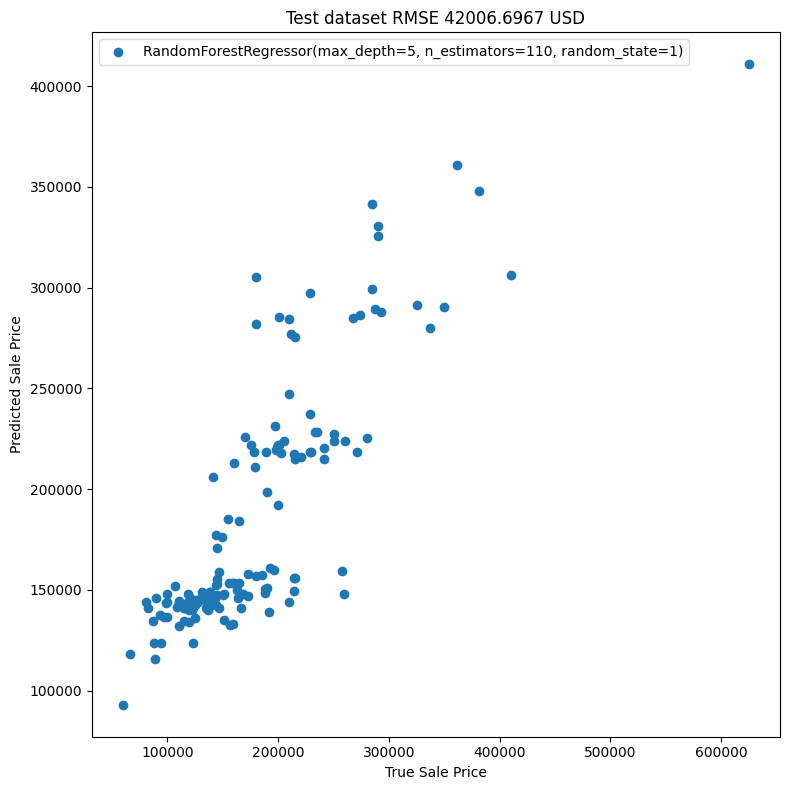

In [52]:
def plot_true_vs_predicted(data, model):
    
    pd_pred, rmse, _ = validation(model, data, target = "SalePrice")

    y_true = pd_pred.iloc[:, 0].values
    y_pred = pd_pred.iloc[:, 1].values
    
    plt.figure(figsize = (8, 8))
    plt.scatter(y_true, y_pred, label = model['regressor'])
    plt.legend()
    plt.xlabel('True Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title(f'Test dataset RMSE {rmse} USD')
    

    plt.tight_layout()
    plt.show()

rf_plot = plot_true_vs_predicted(test_data, train_model)

In [53]:
from sklearn.ensemble import GradientBoostingRegressor


def gradient_boosting_regressor(data, parameters, target, n_estimators = None, max_depth = None, random_state = None):
    result = {}
    
    X = data[parameters[1:]].values
    y = data[target].values
    
    gb_model = GradientBoostingRegressor(loss = 'squared_error', n_estimators = n_estimators, random_state = random_state, max_depth = max_depth)
    gb_model.fit(X, y)
    
    result['regressor'] = gb_model
    result['parameters'] = data[parameters[1:]].columns
    
    return result

In [54]:
gb_model = gradient_boosting_regressor(data = train_data, parameters = final_vars, target = "SalePrice", n_estimators = 30, 
                                      max_depth = 5, random_state = 1)
gb_pred, gb_rmse, gb_mae = validation(model = gb_model, data = test_data, target = "SalePrice")

In [55]:
gb_rmse

44837.0463

In [56]:
gb_mae

31587.1946

In [57]:
gb_pred

,SalePrice,OverallQual-GarageArea-1stFlrSF-FullBath-YearBuilt-TotRmsAbvGrd-YearRemodAdd-CentralAir-ExterQual-KitchenQual-GarageFinish-BsmtQual-SaleCondition
0,214000.0,181209.355809
1,117500.0,141095.119418
2,98300.0,166319.002117
3,210000.0,134686.674744
4,144500.0,165196.606569
...,...,...
141,280000.0,211223.964927
142,173000.0,168298.340430
143,274000.0,302729.565014
144,163500.0,166358.890101


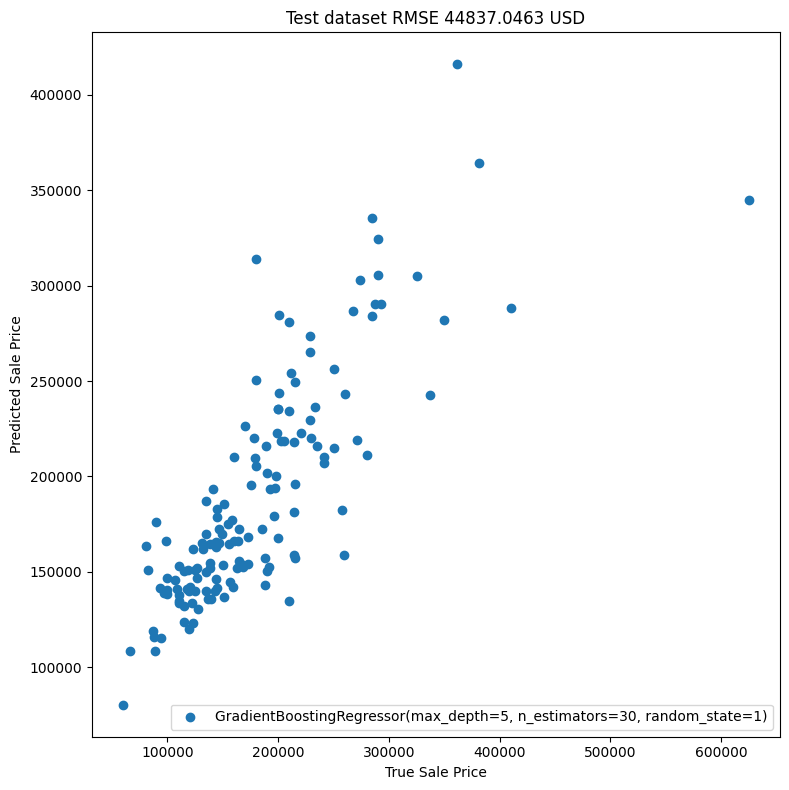

In [58]:
gb_plot = plot_true_vs_predicted(test_data, gb_model)

Для двух моделей машинного обучения были подобраны самые оптимальные гиперпараметры, чтобы rmse и mae показывали наименьшее значение. При всём этом, полученные данные не сильно удовлетворяют понятию рабочей модели, так как корень из среднеквадратичной ошибки не такой уж и маленький. Я считаю, что данных слишком мало для того, чтобы модель предсказывала правильные цены на недвижимость.